<a href="https://colab.research.google.com/github/YesenniaP/introducci-n-github/blob/main/Prediccion_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Proytecto 1

#Predicción de ventas


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
filename ="/content/drive/MyDrive/Data Science/datos/sales_predictions.csv"

df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#1) ¿Cuántas filas y columnas?

df.shape



(8523, 12)

In [5]:
#2) ¿Cuáles son los tipos de datos en cada variable?

df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.
df.duplicated().sum()


0

In [7]:
#4) Identifiquen los valores faltantes.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
#5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

df1 = df.drop(columns=["Outlet_Size","Item_Weight"])

#R/considero pertinente eliminar las columnas "Outlet_Size" y "Item_Weight" dado que no encuentro utilidad de analisis para prediccion de ventas 




In [9]:
#6) Confirmen que no hay valores faltantes después de abordarlos.
df1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [10]:
#7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

df1["Item_Fat_Content"] = df1["Item_Fat_Content"].replace({"LF":"low fat","reg":"regular"})
df1["Item_Fat_Content"] = df1["Item_Fat_Content"].str.title()
df1["Item_Fat_Content"].unique()



array(['Low Fat', 'Regular'], dtype=object)

In [11]:
#8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)
df1.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


Text(0, 0.5, 'Count')

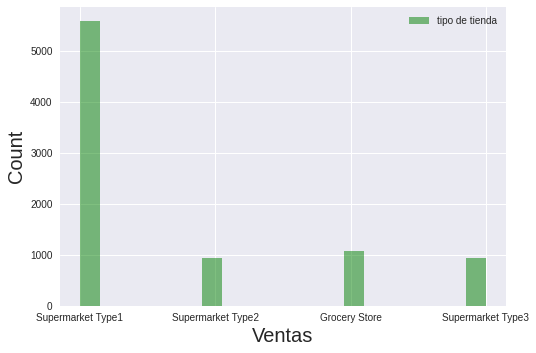

In [12]:
plt.style.use('seaborn')
df1["Outlet_Type"].hist(bins=20, 
                    color="green", 
                    label = "tipo de tienda", 
                    alpha = .5)

plt.legend()
plt.xlabel("Ventas", fontsize=20)
plt.ylabel("Count", fontsize =20)

#ECon este histograma, podemos ver que en el supermercado tipo 1 hay mayor concentración de datos, ahora abien, 
#no se puede determinar si esto es porque presenta mas ventas y por ende mayor ganancias, o es porque es el tipo de tiendas mas frecuente en el data frame



<function matplotlib.pyplot.show(*args, **kw)>

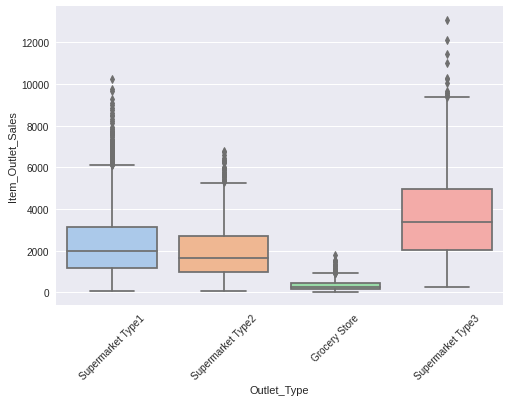

In [13]:

sns.boxplot(data=df1, x="Outlet_Type", y="Item_Outlet_Sales", palette="pastel")
plt.xticks(rotation = 45)
plt.show

#Con este grafico se puede observar que Supermarket type 3 es el tipo de tienda que mas ganancia de ventas tiene y que grocery store es donde menos se regristra ventas. 
#si comparamos con lo que se pudo observar con el histograma en el punto anterior, se puede concluir que supermarket type 1 no es el tipo de tiendan que mas vende
#pero si es el que mas datos concentrados tiene. 
#Tambien se podria concluir con este tipo de visualización que existen mucho datos outliers, seria importante realizar un analisis del cual es el producto que mas
#vende en cada tipo de tienda



Text(0.5, 1.0, 'Grocery Store')

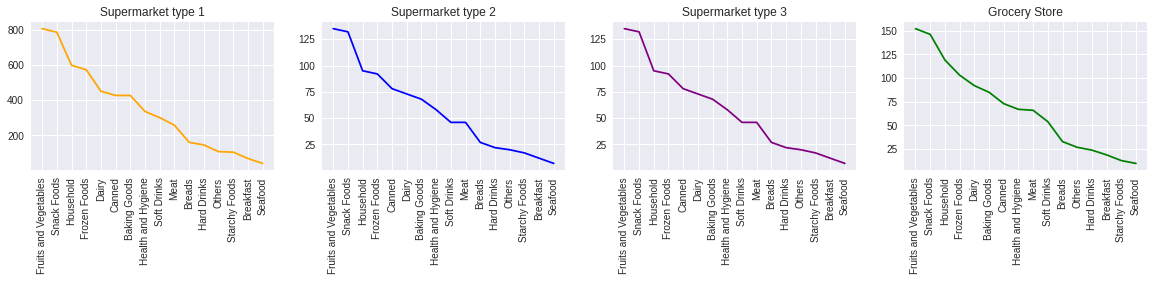

In [37]:
supermark1= df[df["Outlet_Type"]=="Supermarket Type1"]
serie1= supermark1["Item_Type"].value_counts()

supermark2= df[df["Outlet_Type"]=="Supermarket Type2"]
serie2= supermark2["Item_Type"].value_counts()

supermark3= df[df["Outlet_Type"]=="Supermarket Type3"]
serie3= supermark2["Item_Type"].value_counts()

grocery= df[df["Outlet_Type"]=="Grocery Store"]
serie4= grocery["Item_Type"].value_counts()

fig = plt.figure(figsize=(20, 6))

plt.subplot(2,4,1);

plt.plot(serie1[:], color="orange")
plt.xticks(rotation=90)
plt.title("Supermarket type 1")

plt.subplot(2,4,2);

plt.plot(serie2[:], color="blue")
plt.xticks(rotation=90)
plt.title("Supermarket type 2")

plt.subplot(2,4,3);

plt.plot(serie3[:], color="purple")
plt.xticks(rotation=90)
plt.title("Supermarket type 3")

plt.subplot(2,4,4);
plt.plot(serie4[:], color="green")
plt.xticks(rotation=90)
plt.title("Grocery Store")





In [ ]:
#Se puede observar en la gráfica anterior como todos las tiendas sin importar el tipo lo que mas se vende son las frutas y verduras, y lo que menos se vende es la comida de mar. 
#Tambien podemos observar que la tienda que mas vende cada uno de los prodcutos es el supermercado tipo 1 
#El supermercado tipo 2 y tipo 3 tienden a vender en igual cantidad cada uno de los productos que se ofrece
#Si comparamos los resultados de este gáfico con el anterior (boxplot) podemos ver como a pesar de que el supermercado tipo 1 sea el que mas venda cada producto, no es el que mas genera ganancia de ventas
#sino que este lo hace el supermercado tipo 3. Seria importante saber cual es valor en cada tipo de tienda para cada producto, sin embargo dicha variable no se encuentra en nuestro data frame. 

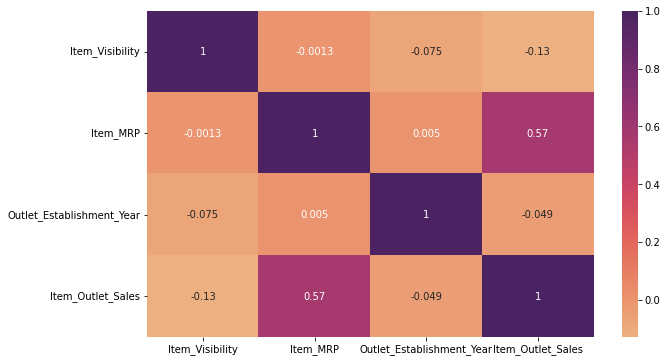

In [ ]:
corr = df1.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap = "flare", annot=True)
plt.show()

#La correlación que hay entre el precio maximo de venta de un producto al publico y las ventas del producto en una tienda particular es moderada de forma positiva